In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from rectangle import Rectangle
from sklearn.linear_model import LinearRegression
import utility

# n=50

In [2]:
df0 = pd.read_csv("Data/Data2Dnoised500.csv", index_col=0)
X0 = df0.iloc[:,0:20].values
y0 = df0[["r1", "r2"]].values
X0_train, X0_test, X0_cal, y0_train, y0_test, y0_cal = utility.calibration_split(X0, y0)
# Fit model to training
model0 = LinearRegression()
model0.fit(X0_train, y0_train)
# Vectorized calibration scores
prediction0 = model0.predict(X0_cal)
scores0 = np.abs(prediction0 - y0_cal)

# Test scores
prediction_test0 = model0.predict(X0_test)
scores_test0 = np.abs(prediction_test0 - y0_test)

In [3]:
# Short-cut
regions0 = utility.full_prediction_regions_2D(scores0, 0.1)
print(f"Scores coverage: {utility.check_coverage_rate(scores0, regions0)}\nTesting scores coverage: {utility.check_coverage_rate(scores_test0, regions0)}")

Scores coverage: 0.92
Testing scores coverage: 0.94


In [4]:
# Original method
Regions0 = utility.full_prediction_regions_2D(scores0, 0.1, short_cut=False)
print(f"Scores coverage: {utility.check_coverage_rate(scores0, Regions0)}\nTesting scores coverage: {utility.check_coverage_rate(scores_test0, Regions0)}")

Scores coverage: 0.92
Testing scores coverage: 0.94


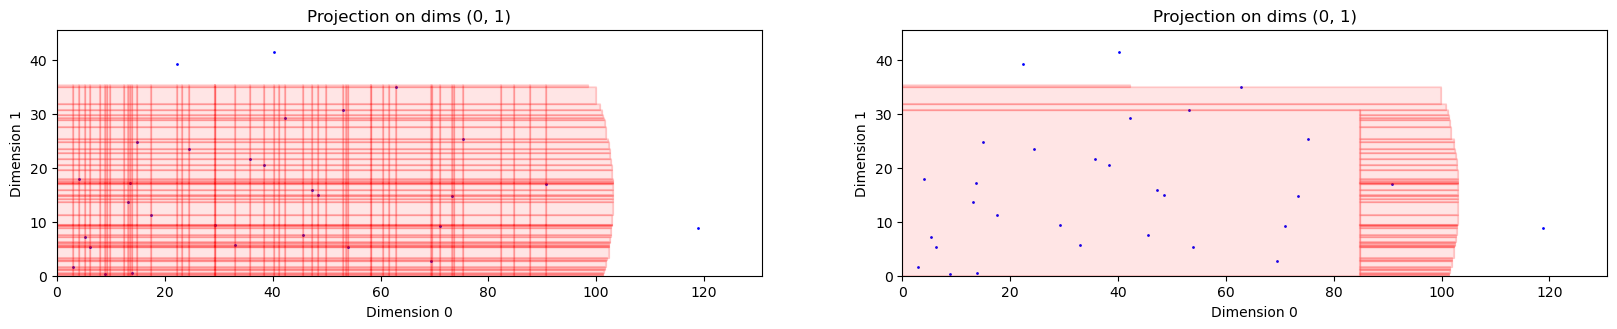

In [5]:
# Quick graph for comparison
fig, axes = plt.subplots(1, 2, figsize = (20, 20))
scores0_T = np.transpose(scores0[:30])
for ax in axes:
    ax.scatter(scores0_T[0], scores0_T[1], color = "blue", s = 1)
    ax.set_xlim(0, np.max(scores0_T, axis=1)[0]*1.1)
    ax.set_ylim(0, np.max(scores0_T, axis=1)[1]*1.1)
for region in Regions0:
    region.draw_2D(axes[0])
for region in regions0:
    region.draw_2D(axes[1])
plt.show()

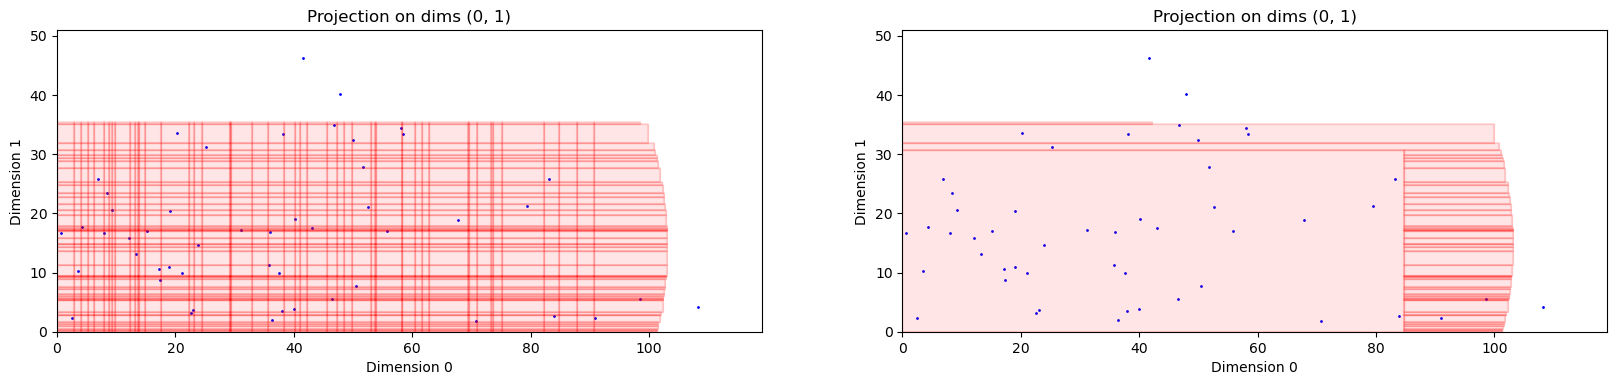

In [6]:
# Quick graph for comparison
fig, axes = plt.subplots(1, 2, figsize = (20, 20))
scores_test0_T = np.transpose(scores_test0)
for ax in axes:
    ax.scatter(scores_test0_T[0], scores_test0_T[1], color = "blue", s = 1)
    ax.set_xlim(0, np.max(scores_test0_T, axis=1)[0]*1.1)
    ax.set_ylim(0, np.max(scores_test0_T, axis=1)[1]*1.1)
for region in Regions0:
    region.draw_2D(axes[0])
for region in regions0:
    region.draw_2D(axes[1])
plt.show()

# n=500

In [7]:
df2 = pd.read_csv("Data/Data2Dnoised5000.csv", index_col=0)
X2 = df2.iloc[:,0:20].values
y2 = df2[["r1", "r2"]].values
X2_train, X2_test, X2_cal, y2_train, y2_test, y2_cal = utility.calibration_split(X2, y2)
# Fit model to training
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
# Vectorized calibration scores
prediction2 = model2.predict(X2_cal)
scores2 = np.abs(prediction2 - y2_cal)

# Test scores
prediction_test2 = model2.predict(X2_test)
scores_test2 = np.abs(prediction_test2 - y2_test)

In [8]:
# Short-cut
regions2 = utility.full_prediction_regions_2D(scores2, 0.1)
print(f"Scores coverage: {utility.check_coverage_rate(scores2, regions2)}\nTesting scores coverage: {utility.check_coverage_rate(scores_test2, regions2)}")

Scores coverage: 0.904
Testing scores coverage: 0.928


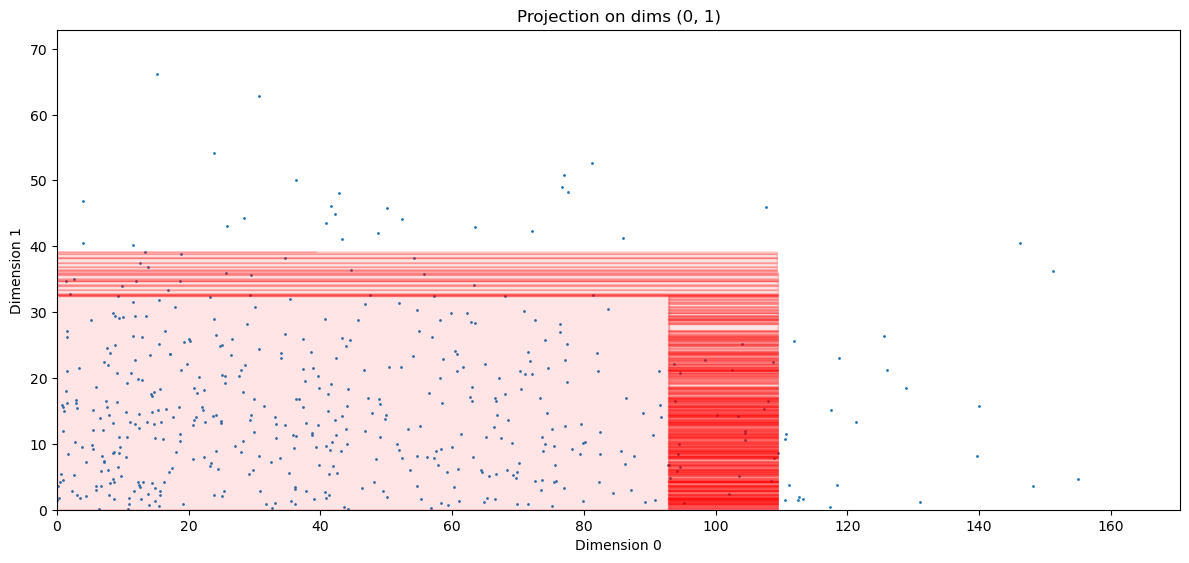

In [9]:
fig, ax = utility.make_score_plot(scores2, 0, 1)
for region in regions2:
    region.draw_2D(ax)
plt.show()